# Training dataset for CNN analysis

In [46]:
import rasterio
import satsearch
import xarray as xr
import os

import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
%matplotlib inline

In [47]:
from data_tools import *

In [48]:
path = "/home/jovyan/data/rainier"
tif_fns = fn_list(path, "*Analytic.tif")

/home/jovyan/data/rainier/644798_1060618_2017-07-25_103d_BGRN_Analytic.tif
/home/jovyan/data/rainier/2575093_1060719_2019-08-04_1039_BGRN_Analytic.tif
/home/jovyan/data/rainier/2548533_1060719_2019-07-25_0f15_BGRN_Analytic.tif
/home/jovyan/data/rainier/2574618_1060618_2019-08-04_0f3d_BGRN_Analytic.tif
/home/jovyan/data/rainier/703947_1060718_2017-08-22_1035_BGRN_Analytic.tif
/home/jovyan/data/rainier/2574848_1060718_2019-08-04_0f4e_BGRN_Analytic.tif
/home/jovyan/data/rainier/794418_1060719_2017-09-28_0f35_BGRN_Analytic.tif
/home/jovyan/data/rainier/2548338_1060718_2019-07-25_1049_BGRN_Analytic.tif
/home/jovyan/data/rainier/703648_1060719_2017-08-22_1014_BGRN_Analytic.tif
/home/jovyan/data/rainier/647037_1060619_2017-07-25_103b_BGRN_Analytic.tif
/home/jovyan/data/rainier/703527_1060618_2017-08-22_0c45_BGRN_Analytic.tif
/home/jovyan/data/rainier/2631559_1060618_2019-08-27_1032_BGRN_Analytic.tif
/home/jovyan/data/rainier/644800_1060718_2017-07-25_100b_BGRN_Analytic.tif
/home/jovyan/data/r

In [49]:
tif_fns[0]

'/home/jovyan/data/rainier/2412593_1060618_2019-06-02_0f4d_BGRN_Analytic.tif'

In [50]:
first, first_ndv=read_raster(tif_fns[0])

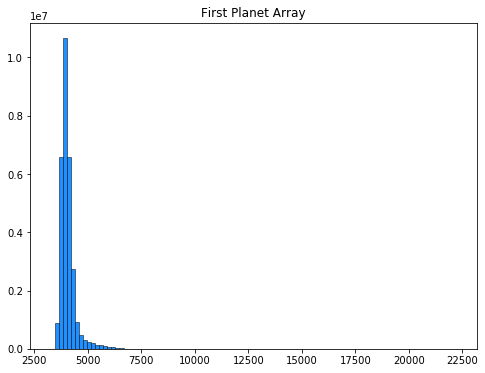

In [51]:
histo_me(arr=np.ma.masked_equal(first,0), title="First Planet Array")

In [52]:
# plot_me(first)

In [53]:
# xarray
width = src.width
blockx = src.profile['blockxsize']
blocky = src.profile['blockysize']
#print(src.profile)
xchunk = int(width/blockx)*blockx
ychunk = blocky
da = xr.open_rasterio(src, chunks={'band': 1, 'x': xchunk, 'y': ychunk})

NameError: name 'src' is not defined

In [100]:
# individual days
days = [i.split("_")[2] for i in tif_fns]
output = set()
for x in days:
    output.add(x)
    
days2 = sorted(output)
print(days2)

['2017-07-25', '2017-08-22', '2017-09-28', '2019-06-02', '2019-07-25', '2019-08-04', '2019-08-27']


In [97]:
day_index = list()
for d in range(0,len(days2)):
        indices = [i for i, x in enumerate(days) if x == list(days2)[d]]
        day_index.append(indices)
        
len(day_index)

7

In [98]:
# select all images from day 1
path_id = list()
for d in range(0,len(day_index)):
    d_paths = [tif_fns[i] for i in day_index[0]]
    path_id.append(d_paths)

len(path_id)

7

In [104]:
len(path_id[0])

13

In [107]:
import os
old_dr = os.getcwd()

In [132]:
os.chdir("/home/jovyan/data/rainier")
os.getcwd()

'/home/jovyan/data/rainier'

In [131]:
# build vrt for dats
! gdalbuildvrt 2017-07-25.vrt *2017-07-25*Analytic.tif

0...10...20...30...40...50...60...70...80...90...100 - done.


In [127]:
r = rasterio.open("test_1.vrt")
r.crs

CRS.from_epsg(32610)

In [126]:
r.bounds
# create polygon with shapely - [[left x, topy], ...]

BoundingBox(left=571500.0, bottom=5159500.0, right=620500.0, top=5208500.0)

In [128]:
! mkdir july17

In [129]:
! cp *2017-07-25*Analytic.tif july17/

In [ ]:
! zip 

In [103]:
xx = fn_list(path, "*2017-07-25*Analytic.tif")

/home/jovyan/data/rainier/644798_1060618_2017-07-25_103d_BGRN_Analytic.tif
/home/jovyan/data/rainier/647037_1060619_2017-07-25_103b_BGRN_Analytic.tif
/home/jovyan/data/rainier/644800_1060718_2017-07-25_100b_BGRN_Analytic.tif
/home/jovyan/data/rainier/644800_1060619_2017-07-25_100b_BGRN_Analytic.tif
/home/jovyan/data/rainier/644798_1060719_2017-07-25_103d_BGRN_Analytic.tif
/home/jovyan/data/rainier/644801_1060718_2017-07-25_0f51_BGRN_Analytic.tif
/home/jovyan/data/rainier/644798_1060619_2017-07-25_103d_BGRN_Analytic.tif
/home/jovyan/data/rainier/644798_1060718_2017-07-25_103d_BGRN_Analytic.tif
/home/jovyan/data/rainier/647037_1060719_2017-07-25_103b_BGRN_Analytic.tif
/home/jovyan/data/rainier/644801_1060618_2017-07-25_0f51_BGRN_Analytic.tif
/home/jovyan/data/rainier/644800_1060719_2017-07-25_100b_BGRN_Analytic.tif
/home/jovyan/data/rainier/644800_1060618_2017-07-25_100b_BGRN_Analytic.tif
/home/jovyan/data/rainier/644801_1060719_2017-07-25_0f51_BGRN_Analytic.tif


13

True

# CREATE COMPOSITE

In [35]:
first1, first_ndv=read_raster(tif_fns[0], band=None)

In [36]:
first1.shape

(4, 8000, 8000)

In [37]:
blue = first1[0,:,:]
green = first1[1,:,:]
red = first1[2,:,:]
nir = first1[3,:,:]

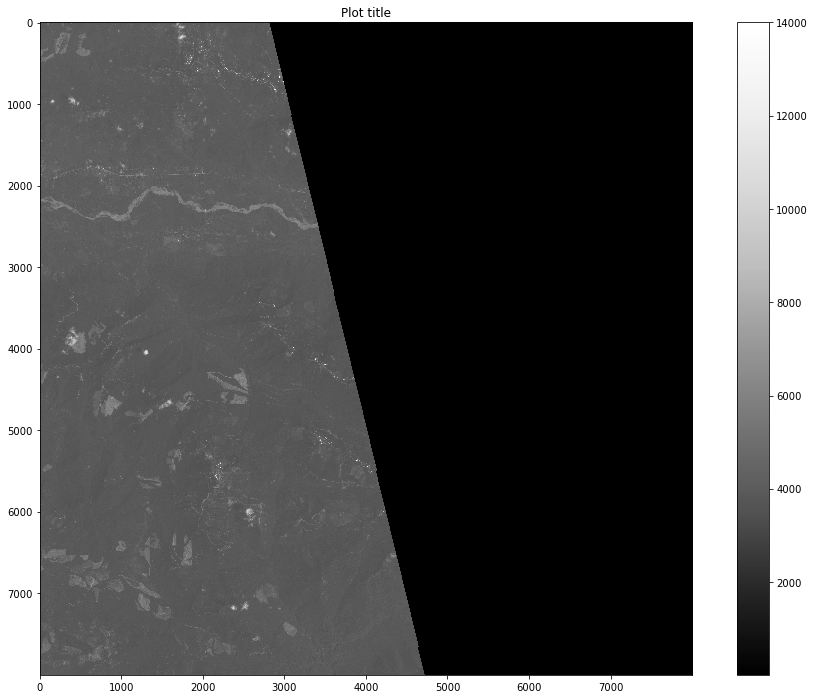

In [38]:
plot_me(blue, vmin=10, vmax=14000)

In [39]:
# plot_me(first1, vmin=10, vmax=14000)

In [40]:
# Normalize bands into 0.0 - 1.0 scale
def normalize(array):
    array_min, array_max = array.min(), array.max()
    return ((array - array_min)/(array_max - array_min))

# Normalize band DN
nirn = normalize(nir)
redn = normalize(red)
greenn = normalize(green)
bluen = normalize(blue)

# Stack bands
nrg = np.dstack((redn, greenn, bluen))

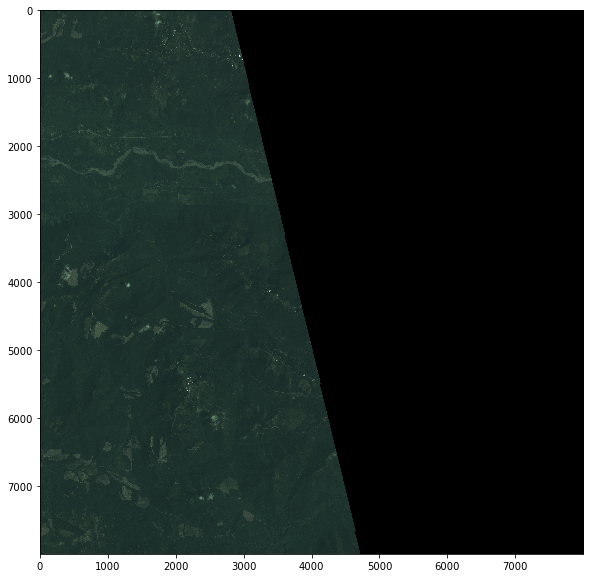

In [41]:
# View the color composite
plt.figure(figsize=(10,10))
plt.imshow(nrg)

In [42]:
def reshape_vrts(img_stack):
    '''Function to reshape vrt image stack for classification'''
    for layer in range(0, img_stack.shape[0]):
        arr=img_stack[layer, :, :]
        if layer == 0:
            reshaped = arr
        else:
            reshaped = np.dstack((reshaped, arr))
    return reshaped

In [43]:
z = reshape_vrts(first1)

In [44]:
z.shape

(8000, 8000, 4)

In [26]:
plot_me(z[:,:,0:3], vmin=100, vmax=14000)

NameError: name 'z' is not defined

In [ ]:
### Questions
 # classification schemes for reflectance values
 # normalize all imagery with corresponding 

In [ ]:
path = "/home/jovyan/data/rainier"
xml_fns = fn_list(path, "*Analytic.xml")